* Authors: Andrea Jiménez Zuñiga, Valentina Díaz Torres e Isabel Afán de Ribera Olaso
* Date: 15/01/2021
* Institution: CUNEF

# Recommendation systems

Recommendation systems are algorithms that try to "predict" the following items (products, songs, movies, etc.) that a particular user will want to purchase. To make the recommendations, the system analyses and processes historical information about the users (age, previous purchases, ratings...), the products or the contents (brands, models, prices, similar content...) and transforms it into actionable knowledge, that is, it predicts which product may be interesting for the user and for the company.

Types of recommendation systems:

* __Content-based filtering__: Content based filters have the product as the basis of the prediction, i.e. it uses the characteristics of the item (brand, price, ratings, size, category, etc.) to make recommendations. With them we can discover options that fit the characteristics of the products or content we have previously enjoyed and choose similar new elements.


* __Collaborative filters__: Collaborative filters generally base their logic on the characteristics of the user. The data you have on the user becomes the focus of a collaborative filter. The system analyses previous purchases, preferences, ratings given to other products, average purchase amounts, etc. and looks for other users who are similar and have made similar decisions. Products that have been successful with similar users will surely interest the new user as well.

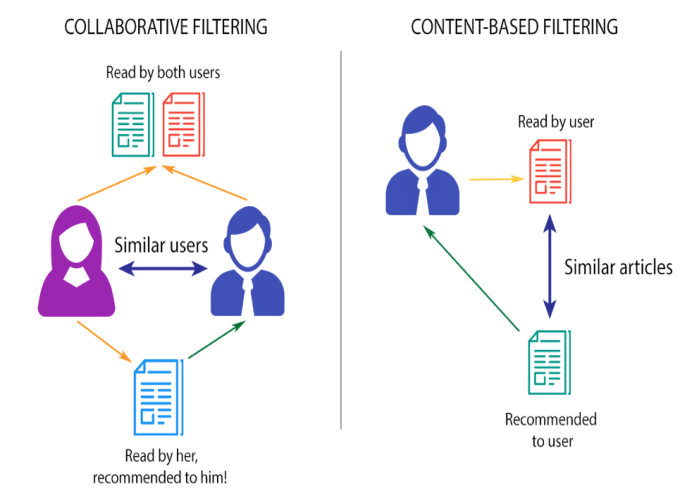

# 03. Content - Based Recommendation system


This type of recommendation relies on the similarity of the items being recommended. This means that when you like an item it is very likely that you are going to like items that are similar to the first you liked. 

The way this works is with the information given by the user, this data can be collected, for example, with the movie ratings given by the users. 

In other words, Content-based recommendation systems are those that try to predict what the user is looking for and what similar suggestions can be shown taking into account some data from the user's history . This type of system is one of the most prevalent today. With them we can discover options that fit the characteristics of the products or content that we have enjoyed before and choose similar new elements.

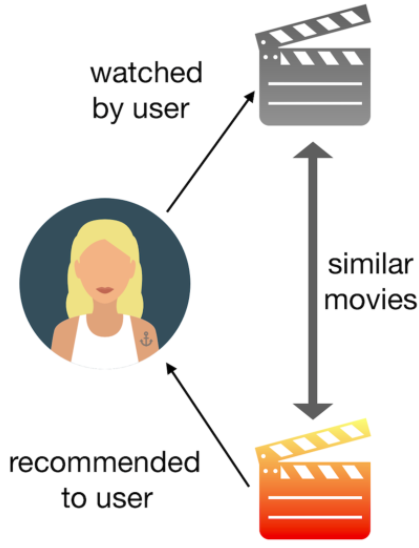

When we talk about content-based recommendation systems it is needed to take into consideration two important terms: 

* Term Frequency
* Inverse Document Frequency


1. __Term Frequency :__ 

This refers to the frequency of a word in a document. 

2. __Inverse Document Frequency :__ 

This refers to the inverse of the document frequency among the hole document.

These two elements are used to determine the  importance of a movie in this case.

## Import Libraries


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import re # expresiones regulares, para eliminar el paréntesis en la columna titulo
pd.options.display.max_columns = None #para poder visualizar todas las columnas sin puntos suspensivos
pd.options.display.max_rows = None #para poder visualizar todas las filas sin puntos suspensivos
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [2]:
df_movies = pd.read_csv('../../data/movies.csv', sep= ",")

In [3]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Now we are going to separate the title from the year of the movie creating a column named _year_, as done previously in the EDA.

In [4]:
# Creating a new column called 'year' by using  the year values from the 'title' column

df_movies['year'] = df_movies.title.str.extract('\s\((\d+)', expand=True)
# quitar los años a la columna titulo
df_movies['title'] = df_movies['title'].str.replace(r"\(.*\)","")
df_movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


### QUITAR LA MUESTRA

In [5]:
df_movies = df_movies.head(10000000)

What we are going to do next is to create a Content-Based recommendation system. This system will be based on the genres of the movies, that is, if a person watches a comedy movie, recommend similar comedy movies.

In order to do this, first we need to turn into a string the column _genres_ from our _movies.csv_ .

In [6]:
# First we need to split the content in the column 'genre', which is separated by '|' and 
# then convert genres to string value (str). 

df_movies['genres'] = df_movies['genres'].str.split('|') 
df_movies['genres'] = df_movies['genres'].fillna("").astype('str')

As mentioned above, it is necessary to take into account two factors: Term Frequency (TF) and Inverse Document Frequency (IDF). The way they are taken into account is by calculating TF-IDF. The formula to calculate the TF-IDF is:

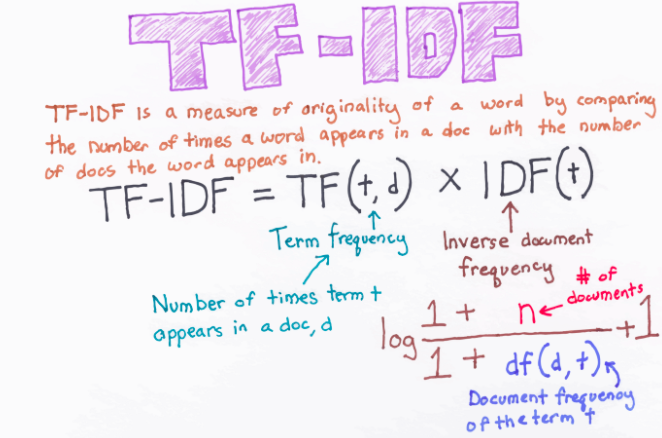

__TF-IDF__ is a numerical measure that expresses how relevant a word is to a document in a collection. This measure is often used as a weighting factor in information retrieval and text mining. The tf-idf value increases proportionally to the number of times a word appears in the document, but is compensated by the frequency of the word in the document collection, which allows for handling the fact that some words are generally more common than others.

Having this in mind, we proceed to calculate the TF-IDF with the _TfidfVectorizer_ as it transforms text to feature vectors that can be used as input to estimator.

In [7]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df_movies['genres'])
tfidf_matrix.shape

(62423, 191)

Once calculated the TF_IDF, it is needed to use the Vector Space Model (VSM) that computes the proximity based on the angle between two vectors. 


A VSM is a way to represent a document in an n-dimensional space vector where “n” is the size of the vocabulary of terms present in the set of documents that we are trying to represent. VSM can be thought of as a point or directed line corresponding to each document in a n-dimensional space emanating from the origin. Thus, each document will be embedded in a n-D space as a directed line or a point. The angles between the vectors are calculated to determine the similarity between the vectors. Next, the user profile vectors are also created based on his actions on previous attributes of items and the similarity between an item and a user is also determined in a similar way.

___Cosine similarity___ is the measure of that angle. The domain of the angle between articles will be from 0° to 180° where 0° means the most similar vectors. The cosine value goes from 0 to 1, if the similarity increases between documents. The calculation of cosine of an angle is also easier than calculating the exact angle.

In [8]:
cosine_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_similarity[:4, :4]

array([[1.        , 0.32107747, 0.06609706, 0.05824133],
       [0.32107747, 1.        , 0.        , 0.        ],
       [0.06609706, 0.        , 1.        , 0.36875378],
       [0.05824133, 0.        , 0.36875378, 1.        ]])

Now we are going to define a function which is going to return the 20 most similar movies based on this cosine similarity calculated above.


In [13]:
movie_titles = df_movies['title'] # Titles of all the movies from our dataset
indexes = pd.Series(df_movies.index, index = df_movies['title']) # indexes that correspond to each title 

# function that returns the 20 most similar movies based on this cosine similarity calculated above.

def movie_recommendations(title):
    index = indexes[title] # Indexed that correspond to each title
    similarity_scores = list(enumerate(cosine_similarity[index])) # Score of our cosine similarity turned to a list and taking the indexes.
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True) # We sort them 
    similarity_scores = similarity_scores[1:21] # we take the 20 most similar ones 
    movie_indexes = [i[0] for i in similarity_scores] # indexed of the movies 
    return movie_titles.iloc[movie_indexes]

* **Top Movie Recommendations :**

In [14]:
movie_recommendations('Toy Story ').head(20)


2203                                                 Antz 
3021                                          Toy Story 2 
3653              Adventures of Rocky and Bullwinkle, The 
3912                            Emperor's New Groove, The 
4780                                       Monsters, Inc. 
9949     DuckTales: The Movie - Treasure of the Lost Lamp 
10773                                           Wild, The 
11604                                     Shrek the Third 
12969                             Tale of Despereaux, The 
17431                             Asterix and the Vikings 
20015                                               Turbo 
22286                                             Aladdin 
22353                                      Boxtrolls, The 
22633                  Toy Story Toons: Hawaiian Vacation 
22634                          Toy Story Toons: Small Fry 
23212                                   The Magic Crystal 
28245                                      Brother Bear 

In [15]:
movie_recommendations('Jumanji ').head(20)


59                            Indian in the Cupboard, The 
124                            NeverEnding Story III, The 
986                              Escape to Witch Mountain 
1954                   Darby O'Gill and the Little People 
2003                                         Return to Oz 
2071                               NeverEnding Story, The 
2072          NeverEnding Story II: The Next Chapter, The 
2308                               Santa Claus: The Movie 
4790                Harry Potter and the Sorcerer's Stone 
9557                                   Magic in the Water 
10450    Chronicles of Narnia: The Lion, the Witch and ...
10674                                Five Children and It 
10733                             Brothers Lionheart, The 
11332                                Bridge to Terabithia 
11973                                 Golden Compass, The 
12042                Water Horse: Legend of the Deep, The 
12347           Chronicles of Narnia: Prince Caspian, Th

In [16]:
movie_recommendations('Father of the Bride Part II ').head(20)


17                                           Four Rooms 
18                       Ace Ventura: When Nature Calls 
64                                             Bio-Dome 
68                                               Friday 
87                                          Black Sheep 
100                                           Mr. Wrong 
102                                       Happy Gilmore 
113                           Happiness Is in the Field 
117                             Steal Big, Steal Little 
123                              Flirting With Disaster 
133                                      Down Periscope 
139                                       Birdcage, The 
142                              Brothers McMullen, The 
172                                           Jury Duty 
174                                  Living in Oblivion 
185                                          Party Girl 
201    To Wong Foo, Thanks for Everything! Julie Newmar 
214                            

It can be seen that this system gives quite good recommendations based on the genre of the film. For example, with Toy Story you can see that the top 20 movies recommended by this system are Antz, Toy Story 2, Monsters Inc, etc, which are of the same type. 